<a href="https://colab.research.google.com/github/heydarimehrshad79/Food-Vision/blob/main/Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
import pandas as pd
import os
import zipfile
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

##Downloading Dataset

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip downloaded dataset
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-01-06 14:19:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   131MB/s    in 0.8s    

2022-01-06 14:19:08 (131 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [7]:
def print_num_of_file(path):
  """
   walk through pizza_steak directory and list number of files
   """
  for dir_path, dir_names, file_names in os.walk(path):
    print(f"there are {len(dir_names)} directories and {len(file_names)} files in '{dir_path}'")


print_num_of_file(path='pizza_steak')

there are 2 directories and 0 files in 'pizza_steak'
there are 2 directories and 0 files in 'pizza_steak/test'
there are 0 directories and 250 files in 'pizza_steak/test/pizza'
there are 0 directories and 250 files in 'pizza_steak/test/steak'
there are 2 directories and 0 files in 'pizza_steak/train'
there are 0 directories and 750 files in 'pizza_steak/train/pizza'
there are 0 directories and 750 files in 'pizza_steak/train/steak'


In [8]:
# get the name of image classes programmatically
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
def view_random_image_from_dataset(target_dir, target_class):
  target_folder = target_dir + target_class

  # get a random image path to show it
  random_image = random.sample(os.listdir(target_folder), 1)

  # read in random image and plot it
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}\n')

  return img / 255.

Image shape: (512, 512, 3)



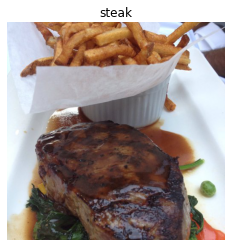

In [10]:
random_img = view_random_image_from_dataset('pizza_steak/train/', 'steak')

##Build our CNN Model to Detection

In [11]:
# set random seed for reproducibility
RAND_SEED = 42
tf.random.set_seed(RAND_SEED)

# Define directory of dataset paths
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# create train and test data generators and rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                               target_size=(224, 224), # target size of images (height, width)
                                               class_mode="binary", # type of data you are working with
                                               batch_size=32,
                                               seed=RAND_SEED) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32,
                                             seed=RAND_SEED)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Plotting Validation and Training Curves

In [12]:
# plot validation and training curves seperately
def plot_loss_curevs(history):
  """
  returns seperate loss curves for training and validation metrics 
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val loss")
  plt.title("Loss")
  plt.xlabel("loss")
  plt.legend();
  
  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val accuracy")
  plt.title("Accuracy")
  plt.xlabel("Accuracy")
  plt.legend();


In [13]:
EPOCHS = 5
filters = 10

# Build Model_1
model_1 = Sequential()
model_1.add(Conv2D(filters=filters, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_1.add(Conv2D(filters=filters, kernel_size=3, activation="relu"))
model_1.add(MaxPool2D(pool_size=2, padding="valid"))
model_1.add(Conv2D(filters=filters, kernel_size=3, activation="relu"))
model_1.add(Conv2D(filters=filters, kernel_size=3, activation="relu"))
model_1.add(MaxPool2D(pool_size=2))
model_1.add(Flatten())
model_1.add(Dense(1, activation="sigmoid"))

# Compile Model_1
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the Model_1
history_1 = model_1.fit(train_data,
            epochs=EPOCHS,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 255ms/step - loss: 0.5688 - accuracy: 0.6973 - val_loss: 0.4232 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4306 - accuracy: 0.8140 - val_loss: 0.3339 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3889 - accuracy: 0.8280 - val_loss: 0.3100 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3707 - accuracy: 0.8413 - val_loss: 0.3869 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 12s 245ms/step - loss: 0.3517 - accuracy: 0.8473 - val_loss: 0.3036 - val_accuracy: 0.8580


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

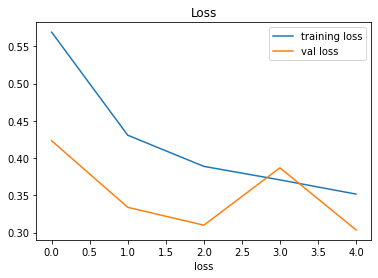

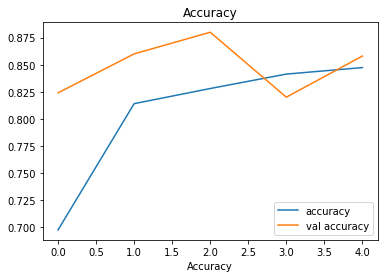

In [15]:
plot_loss_curevs(history_1)

In [16]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, image_shape=224):
  """
  Reads an image from filename, turn it into a tensor and reshape it to (img_shape, img_shape, color_channels)
  """
  # read in the image
  img = tf.io.read_file(filename)
  # decode the read file into tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, size=[image_shape, image_shape])
  # rescale the image(get all values between 0 and 1)
  img = img / 255.
  return img

In [17]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  import an image located at filename, makes a prediction with model and plots
   the image with the predicted class as the title
  """
  # import target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Calculate accuracy
  pred_accuracy = (pred[0] if pred[0] > 0.5 else 1 - pred[0])[0] 
  
  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predicted as: {pred_class} | Accuracy: {pred_accuracy}")
  plt.axis(False)
  return pred_class

In [ ]:
# Downloading some image from my github repo to test our model
!wget https://raw.githubusercontent.com/heydarimehrshad79/Food-Vision/main/image/pizaa/pizza03.jpg

!wget https://raw.githubusercontent.com/heydarimehrshad79/Food-Vision/main/image/steak/steak04.jpg
!wget https://raw.githubusercontent.com/heydarimehrshad79/Food-Vision/main/image/steak/steak02.jpg

## Testing our Model with Custom Images

'pizza'

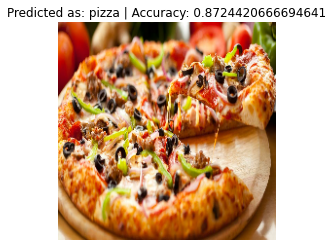

In [19]:
# test our model on custom image
pred_and_plot(model_1, "pizza02.jpg")

'steak'

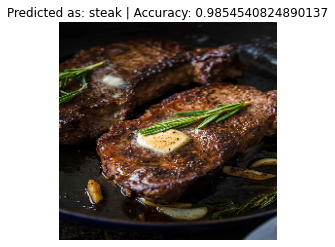

In [20]:
# test our model on custom image
pred_and_plot(model_1, "steak02.jpg")